In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

### 데이터 가져와서 합치기

In [2]:
df1 = pd.read_csv('./data/1500.csv', encoding='cp949')
df2 = pd.read_csv('./data/3000.csv', encoding='cp949')
df3 = pd.read_csv('./data/4500.csv', encoding='cp949')
df4 = pd.read_csv('./data/6000.csv', encoding='cp949')
df5 = pd.read_csv('./data/7500.csv', encoding='cp949')
df6 = pd.read_csv('./data/9000.csv', encoding='cp949')
df7 = pd.read_csv('./data/10500.csv', encoding='cp949')
df8 = pd.read_csv('./data/12000.csv', encoding='cp949')
df9 = pd.read_csv('./data/13500.csv', encoding='cp949')
df10 = pd.read_csv('./data/15000.csv', encoding='cp949')
df11 = pd.read_csv('./data/16500.csv', encoding='cp949')
df12 = pd.read_csv('./data/18000.csv', encoding='cp949')
df13 = pd.read_csv('./data/19500.csv', encoding='cp949')
df14 = pd.read_csv('./data/21000.csv', encoding='cp949')
df15 = pd.read_csv('./data/22500.csv', encoding='cp949')
df16 = pd.read_csv('./data/24000.csv', encoding='cp949')
df17 = pd.read_csv('./data/25500.csv', encoding='cp949')
df18 = pd.read_csv('./data/27000.csv', encoding='cp949')
df19 = pd.read_csv('./data/28500.csv', encoding='cp949')
df20 = pd.read_csv('./data/30000.csv', encoding='cp949')
df21 = pd.read_csv('./data/31500.csv', encoding='cp949')
df22 = pd.read_csv('./data/33000.csv', encoding='cp949')
df23 = pd.read_csv('./data/34500.csv', encoding='cp949')
df24 = pd.read_csv('./data/36000.csv', encoding='cp949')
df25 = pd.read_csv('./data/37500.csv', encoding='cp949')
df26 = pd.read_csv('./data/39000.csv', encoding='cp949')
df27 = pd.read_csv('./data/40500.csv', encoding='cp949')
df28 = pd.read_csv('./data/42000.csv', encoding='cp949')
df29 = pd.read_csv('./data/43500.csv', encoding='cp949')
df30 = pd.read_csv('./data/45313.csv', encoding='cp949')

In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
               df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
               df21, df22, df23, df24, df25, df26, df27, df28, df29, df30], axis=0)
df

,word,count
0,한국,586
1,BTS,184
2,씨,135
3,사람,120
4,문화,110
...,...,...
995,ngi,1
996,thu,1
997,Thiu,1
998,khin,1


### word 기준 count 합치기

In [4]:
df = df.groupby('word').sum()
df = df.sort_values(by='count', ascending=False)
df.reset_index(drop=False, inplace=True)
df

,word,count
0,한국,18281
1,문화,5761
2,영화,4396
3,세계,4075
4,명,3799
...,...,...
10746,standards,1
10747,Dillahunt,1
10748,stardom,1
10749,Veysel,1


In [5]:
word = df.head(1000)
word

,word,count
0,한국,18281
1,문화,5761
2,영화,4396
3,세계,4075
4,명,3799
...,...,...
995,댄서,46
996,시도,46
997,Kltr,46
998,military,46


### BTS(2957) + 방탄소년단(2670)

In [6]:
s = 2957 + 2670
word.loc[word['word'] == 'BTS', 'count'] = s
word = word.drop(index=word.loc[word.word == '방탄소년단'].index)
word.reset_index(drop=True, inplace=True)

### 오징어 게임(1376) + Squid(141)

In [7]:
word.loc[word['word'] == '오징어', 'word'] = '오징어게임'
word.loc[word['word'] == '게임', 'count'] = 1767 - 1376

s = 1376 + 141
word.loc[word['word'] == '오징어게임', 'count'] = s
word = word.drop(index=word.loc[word.word == 'Squid'].index)
word.reset_index(drop=True, inplace=True)

### K팝(3760) + Kpop(668) + K-pop(640) + KPop(340) + KPOP(298) + K-POP(182)

In [8]:
s = 3760 + 668 + 640 + 340 + 298 + 182
word.loc[word['word'] == '팝', 'word'] = 'K팝'
word.loc[word['word'] == 'K팝', 'count'] = s
word = word.drop(index=word.loc[word.word == 'Kpop'].index)
word = word.drop(index=word.loc[word.word == 'K-pop'].index)
word = word.drop(index=word.loc[word.word == 'KPop'].index)
word = word.drop(index=word.loc[word.word == 'KPOP'].index)
word = word.drop(index=word.loc[word.word == 'K-POP'].index)
word.reset_index(drop=True, inplace=True)

### 넷플릭스(1146) + Netflix(144)

In [9]:
s = 1146  + 144
word.loc[word['word'] == '넷플릭스', 'count'] = s
word = word.drop(index=word.loc[word.word == 'Netflix'].index)
word.reset_index(drop=True, inplace=True)

### 블랙핑크(785)

In [10]:
word.loc[word['word'] == '블랙', 'word'] = '블랙핑크'
word.loc[word['word'] == '핑크', 'count'] = 877 - 785

### 상위 1000개 값 확인 (word_dict는 불용어 처리 위한 확인용)

In [11]:
word_dict = word.head(1000)
word_dict = word_dict.set_index('word').to_dict()['count']
word_dict

{'한국': 18281,
 '문화': 5761,
 '영화': 4396,
 '세계': 4075,
 '명': 3799,
 'K팝': 5888,
 '드라마': 3610,
 '달러': 3561,
 '중': 3100,
 '동안': 3097,
 '사람': 3020,
 'BTS': 5627,
 '그룹': 2810,
 '일': 2810,
 '감독': 2485,
 '작품': 2429,
 '팬': 2334,
 '산업': 2109,
 '시작': 2088,
 '증가': 1909,
 '때': 1907,
 '서울': 1901,
 '이번': 1900,
 '씨': 1898,
 '음악': 1880,
 '행사': 1807,
 '인기': 1797,
 '공연': 1786,
 '게임': 391,
 '전체': 1729,
 '번': 1715,
 '배': 1691,
 '멤버': 1673,
 '수출': 1610,
 '개': 1596,
 '생각': 1585,
 '자신': 1575,
 '개최': 1564,
 '때문': 1561,
 '음식': 1528,
 '미국': 1528,
 '한국의 문화': 1525,
 '위': 1521,
 '이야기': 1516,
 '인구': 1511,
 '이익': 1500,
 '한국의 경제': 1500,
 '종사자': 1500,
 '노동': 1500,
 '시간': 1479,
 '활동': 1426,
 '오징어게임': 1517,
 '예정': 1362,
 '전통': 1353,
 '작가': 1250,
 '일본': 1237,
 '이후': 1230,
 '아시아': 1203,
 '배우': 1164,
 '한국문화원': 1160,
 '전시': 1158,
 '성공': 1154,
 '대표': 1153,
 '넷플릭스': 1290,
 '예술': 1132,
 '케이': 1121,
 '역사': 1110,
 '김치': 1105,
 '진행': 1104,
 '국제': 1099,
 '후': 1091,
 '발표': 1091,
 '시': 1089,
 '요리': 1077,
 '최근': 1056,
 '국가': 1055,
 '데

### 불용어 처리 -> count 0으로 바꿈

In [12]:
stopwords = ['한국', '문화', '명', '달러', '중', '동안', '사람', '일', '산업', '시작', '때', '증가', '서울', '이번', '씨', '전체', '개', '생각', '자신', '개최', '때문', '미국', '한국의 문화', '위', '이야기',
            '인구', '이익', '한국의 경제', '종사자', '노동', '시간', '활동', '예정', '일본', '이후', '한국문화원', '대표', '역사', '진행', '발표', '시', '최근', '국가', '데', '간', '한국인', ' 사용',
            '인도', '지역', '올해', '태국', '세', '전', '여성', '이상', '처음', '만', '사회', '필리핀', '한', '시장', '공개', '프로그램', '설명', '집', '뿐', '다음', '제작', '중국', '경험', '가족',
            '회', '번', '배', '아시아', '케이', '후', '방문', '사랑', '포함', '.com', '곳', '글', '점', '제공', '관심', '부산', '시즌', '대회', '예', '영상', '카자흐스탄', '경제', '관계', '식', '일부',
            '속', '도시', 'The', '정부', '대통령', '문제', '바', '기회', '나라', '관련', '현대', '소개', '김', '사실', '참여', '분', '준비', '경기', '필요', '당시', '모습', '사진', '부문', '코로나', 
            '영향', '가지', '의미', '이유', '차지', '이름', '있다', '인', '주년', '노력', '대사', '군', '자', '지원', '이', '온라인', '촬영', '정도', '키', '삶', '스타일', '날', '구성', '양국', '역할',
            '면', '장', '원', '경우', '대부분', '리', '박', '미', '이해', '부분', '사이', '계획', '우', '방식', '등장', '지', '재료', '주제', '표현', '참가', '홍보', '달', '지금', '판매', '마음', '방법',
            '르', '대한민국', '상황', '협력', '장소', '학생', '물', '기간', '길', '남성', '시대', '아이', '언급', '외', '참석', '주', '공동', '공식', '마지막', '도움', '편', '상', 'Korea', '기술',
            '장면', '튀르', '브랜드', '인해', '위치', '장르', '결정', '친구', '세대', '이전', '해당', '경쟁', '복무', '앞', '과정', '분야', '거리', '병역', '식당', '개인', '사건', '북한', '뒤', '존재',
            '영어', '교수', '우영', '백악관', '자리', '드', '공유', '계속', '중단', '눈', '19', '제품', '터키', '의상', '변화', '참가자', '규모', '대', '미래', 'South', '선택', '언어', '시청', '보도', 
             '번역', '프로젝트', '영감', '남', '공간', '이탈리아', '차', '결과', '동시', '한편', '선정', '현지', '코리아', '유지', '미술', '오후', '국내', '안', '변호사', '회사', '작업', '목표', '주최',
            '요소', '최대', '체험', '지속', '작', '건강', '디자이너', '상징', '연주', 'for', '문화원', '어머니', '기억', '내용', '자연', '프리즈', '종이', '베트남', '카', '배경', '가치', '투자', '유럽',
            '팬데믹', '소속사', '이다', '영국', '제주도', '시기', '회장', '수교', '감정', '법', '문', '수준', 'Kore', '우승', '센터', '감사', '모두', '스님', '아', '일반', '과거', '피', '밤', '단',
            '마을', '확인', '반', '사업', '대사관', '장관', '주간', '프랑스', '디자인', '조회', '발효', '정치', '파워', '논의', '바이든', '오늘날', '조사', '운영', '식사', '하', '보이', '러시아', '현상',
            '피부', '출신', '고려인', '한국의 전통', '티', '독일', '범죄', '파', '발견', '힘', '중심', '정', '초', '기자', '홍콩', '기업', '황', '손', '국민', '의무', '무료', '살', '대학', '유치', '토',
            '소프트', '차별', '고기', '학교', '발', '집중', '덕분', 'Gney', '적', '흥미', '교육', '오늘', '부모', '가운데', '현재', '정보', '질문', '측', '마찬가지', '책', 'with', '남자', '연상', '아시아인',
            '업계', '그림', '추가', '강조', '전쟁', '상품', '현실', '생활', '스페인', '로', '나이', '뉴욕', '호주', '에', '서양', '코', '메시지', '이자', '예상', '지난해', 'World', '원장', '역', '카페',
            '여자', '연습', '골', '고려', '아버지', 'India', '기여', '런던', '강좌', '마련', '기반', 'Times', '카타르', '자폐증', '섬', '느낌', '개월', '축하', '코리안', '여름', '폭력', '뜻', '아기',
            '강화', '라고', '소스', '도쿄', '활용', '소리', '배추', '5월', '주민', '수익', '순간', '월드', '우주', '소식', 'Kim', '평가', '디', '부', '증오', '부상', '보유', '휴식', '이용', '최', '추석',
            '바다', '묘사', '참전', '10월', '정관', 'New', '브라질', '왕', '경찰', '어', '송', '지지', '김밥', '해', '베', '금지', '종류', '강', '장애', '의원', '엄마', '서비스', '건물', '태', '소',
            '양념', '국방부', '오', '이집트', '레시', '레', '증오범죄', '건', '앙카라', 'Corea', '스파', 'Seoul', '쿠', '개발', '서구', '전문', '인식', '인종', '옷', '돈', '연구', 'del', '혁', '헝가리', '닭',
            '수집가', '꿈', '주장', '젊은이들', '세상', 'News', '효과', '인정', '희망', '연결', '윤', '해녀', '고레', '초대', '밥', '신문', '기관', '인정', '희망', '자체', '특징', '영어권', '박사', '정신',
            'How', '황동', '멕시코', '설립', '채', '분위기', '반죽', '소재', '벨기에', '6월', '호', 'Lee', '고추장', 'Park', '한국관광공사', '게', 'Proof', '상태', 'Koreas', '빅', '소금']

for i in range(len(word)):
    if word.at[i, 'word'] in stopwords:
        word.at[i, 'count'] = 0
        
word

,word,count
0,한국,0
1,문화,0
2,영화,4396
3,세계,4075
4,명,0
...,...,...
987,댄서,46
988,시도,46
989,Kltr,46
990,military,46


### 최종 상위 200개

In [13]:
final = word.sort_values(by='count', ascending=False)
final = final.head(150)
final.reset_index(drop=True, inplace=True)
final

,word,count
0,K팝,5888
1,BTS,5627
2,영화,4396
3,세계,4075
4,드라마,3610
...,...,...
145,만화,155
146,브로커,147
147,협회,147
148,막걸리,145


In [14]:
final.to_csv('./워드클라우드_count.csv', index=False)

In [15]:
final_dict = final.set_index('word').to_dict()['count']
final_dict

{'K팝': 5888,
 'BTS': 5627,
 '영화': 4396,
 '세계': 4075,
 '드라마': 3610,
 '그룹': 2810,
 '감독': 2485,
 '작품': 2429,
 '팬': 2334,
 '음악': 1880,
 '행사': 1807,
 '인기': 1797,
 '공연': 1786,
 '멤버': 1673,
 '수출': 1610,
 '음식': 1528,
 '오징어게임': 1517,
 '전통': 1353,
 '넷플릭스': 1290,
 '작가': 1250,
 '배우': 1164,
 '전시': 1158,
 '성공': 1154,
 '예술': 1132,
 '김치': 1105,
 '국제': 1099,
 '요리': 1077,
 '사용': 1035,
 '기록': 1025,
 '시리즈': 1025,
 '한류': 1001,
 '콘서트': 980,
 '팀': 980,
 '스타': 919,
 '관객': 897,
 '영화제': 859,
 '노래': 853,
 '최고': 840,
 '아티스트': 838,
 '앨범': 830,
 '선수': 792,
 '축제': 791,
 '곡': 788,
 '블랙핑크': 785,
 '한국어': 746,
 '콘텐츠': 736,
 '최초': 707,
 '여행': 686,
 'Korean': 684,
 '무대': 678,
 '가수': 633,
 '패션': 626,
 '교류': 603,
 '전시회': 575,
 '발전': 553,
 '쇼': 550,
 '맛': 530,
 '데뷔': 525,
 '해외': 523,
 '아이돌': 511,
 '상영': 506,
 '글로벌': 500,
 '수상': 499,
 '출연': 496,
 '연기': 489,
 '갤러리': 478,
 '플랫폼': 478,
 '인터뷰': 477,
 '밴드': 472,
 '댄스': 471,
 '유튜브': 466,
 '한복': 464,
 '춤': 462,
 '관광': 460,
 '기념': 459,
 '한식': 455,
 '스트리밍': 450,
 '성장': 446,
 '기대': 444

In [19]:
# from wordcloud import WordCloud
# from collections import Counter

# plt.figure(figsize=[20, 15])
# sns.set_style('white')
# font_path = 'C:\Windows\Fonts\HMFMMUEX.TTC'
# wc = WordCloud(font_path=font_path, background_color='white', colormap='Dark2', width=2000, height=1000, prefer_horizontal=True).generate_from_frequencies(final_dict)
# plt.axis('off')
# plt.imshow(wc)
# plt.show()

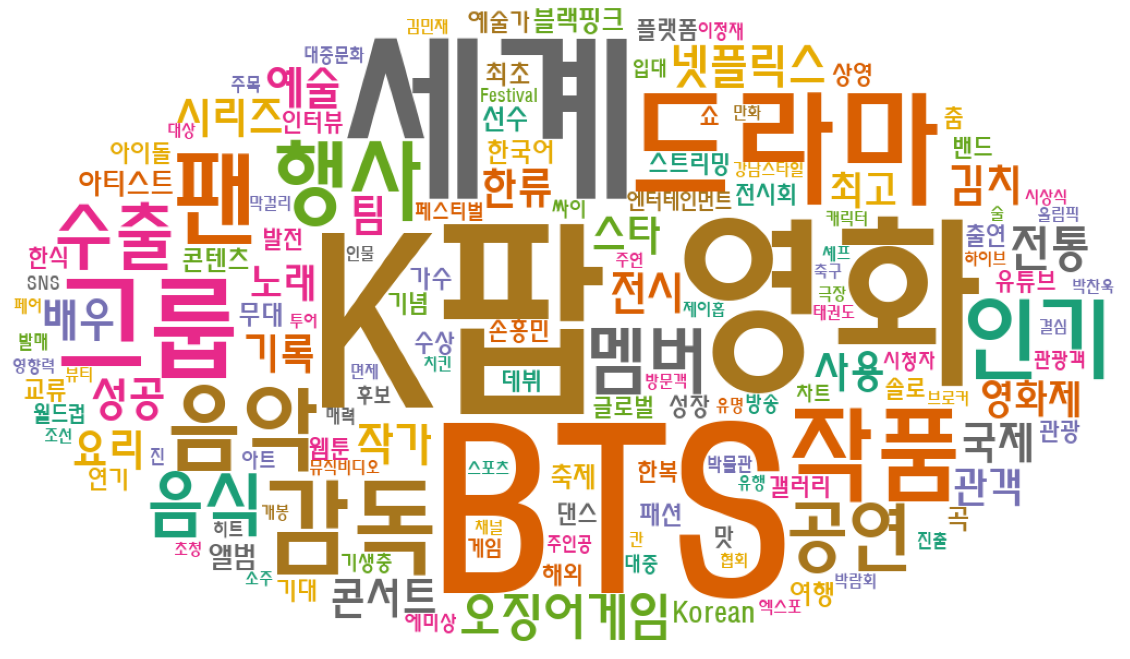

In [53]:
##원 모양으로 워드클라우드

from PIL import Image
import numpy as np
from wordcloud import WordCloud
from collections import Counter

count = Counter(final_dict)
word = count.most_common(200)

im = Image.open('mask.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

sns.set_style('white')
font_path = 'C:\Windows\Fonts\HMFMMUEX.TTC'

#prefer_horizontal=Ture -> 글씨 똑바르게 나오게 하기
wc = WordCloud(font_path=font_path, background_color='white', colormap='Dark2',width=2000, height=1000, mask=mask_arr,prefer_horizontal=True).generate_from_frequencies(final_dict)

plt.figure(figsize = (20, 20))  
plt.imshow(wc)
plt.axis('off')
plt.show()

In [46]:
# End of File